# Изучение закономерностей, определяющих успешность игр

### Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Предоставлены данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

### Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 

In [2]:
#  data = pd.read_csv('C:\\Users\\elena\\OneDrive\\Рабочий стол\\games.csv')
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Вывод:***

В данных встречается достаточно много пропусков, типы данных не во всех столбцах корректны. Названия столбцов предстоит привести к нижнему регистру.

### Подготовка данных

1) Для начала приведем названия столбцов к нижнему регистру:

In [4]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


2) Обработаем пропуски:
* заметим, что в столбце `name` и `genre` всего два пропуска - выведем эти строки на экран;

In [5]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Информации об этих играх практически нет - ни названия, ни жанра, ни оценок, ни рейтинга. Кроме того, продажи достаточно низкие. Удалим эти данные, так как их информативность практически нулевая.

In [6]:
data = data.drop(labels=[659, 14244], axis=0)
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* в столбце `year_of_release` пропусков не так много, но заменить их на медиану или среднее было бы не очень коректно - лучше оставить как есть

В столбце `user_score` тип данных **object**, что вызывает подозрения. Посмотрим на уникальные значения этого столбца:

In [7]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим строковое значение **tbd**. Оказывается, что TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Получается, оценок было недостаточно для составления рейтинга. 

* так как в столбце `user_score` есть нулевой рейтинг, то заменять пропуски и **tbd**-значения нулями не стоит. Заменим эти значения, например, на ***-1***, чтобы не присваивать неверные оценки и, в то же время, не оставлять проспуски. Таким образом,  ***-1*** будет сигнализировать о том, что информации в конкретной ячейке нет;

In [8]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
data['user_score'] = data['user_score'].fillna(-1)

* так же поступим со столбцом `critic_score`;

In [9]:
data['critic_score'] = data['critic_score'].fillna(-1)

* в столбце `rating` заменим пропуски на строковое значение **nan**;

In [10]:
data['rating'] = data['rating'].fillna('nan')

3) Изменим типы данных в следующих столбцах:
* в столбце `year_of_release` изменим тип данных на **int**, так как в нем указан год выпуска - целое число;

In [11]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

* в столбце `user_score` изменим тип данных на **float**;

In [12]:
data['user_score'] = data['user_score'].astype('float')

In [13]:
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Посмотрев на уникальные значения колонки `critic_score`, приходим к выводу, что все значения целочисленные. Смело меняем тип данных на **int**:

In [14]:
data['critic_score'] = data['critic_score'].astype('int64')

In [15]:
display(data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,nan
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,nan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


Теперь типы данных более подходящие для дальнейшей работы, пропуски по возможности заполнены, можно приступать к расчетам и анализу данных.

4) Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,nan,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,nan,31.38


### Исследовательский анализ данных

1) Построим гисторгамму распределения по годам выпуска игр:

<AxesSubplot:>

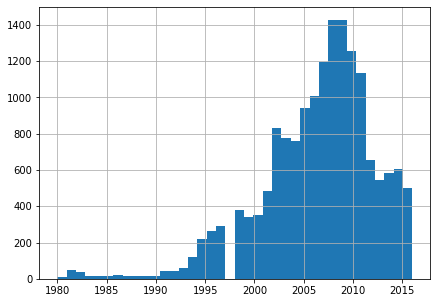

In [17]:
data['year_of_release'].hist(bins=38, figsize=(7, 5))

***Вывод:***

Из гистограммы видно, что до 1994-го года было выпущено достаточно мало игр. Пик наблюдается в 2009-2010 годах, далее - спад. 

2) Далее выделим платформы с наибольшими суммарными продажами при помощи гистограммы:

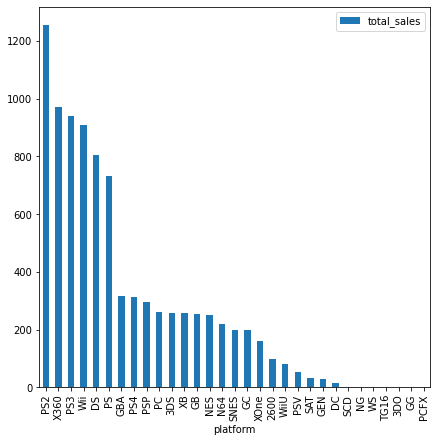

In [18]:
(data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', figsize=(7, 7)).legend())

***Вывод:***

По графику хорошо видно топ-6 платформ - **PS2**, **X360**, **PS3**, **Wii**, **DS**, **PS**. Выделим их в отдельную таблицу:

In [19]:
top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [20]:
top_platform = data[data['platform'].isin(top)]

3) Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы:

<AxesSubplot:xlabel='year_of_release'>

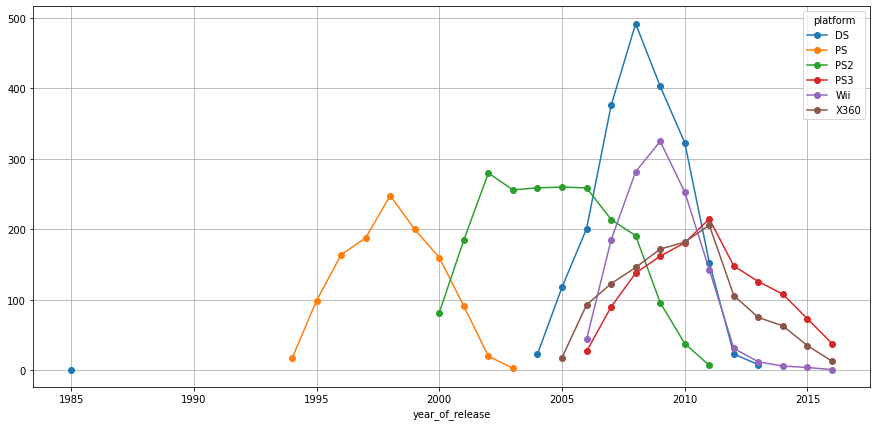

In [21]:
(top_platform.pivot_table(index='year_of_release', columns = 'platform', values='name', aggfunc='count')
 .plot(style='o-', figsize=(15, 7), grid=True))

***Вывод:***

* платформа **DS** выпускала игры с 2004 года до 2013 (появилась в 1985г., однако данных до 2004 нет);
* платформа **PS** выпускала игры с 1994 года до 2003 (9 лет);
* платформа **PS2** выпускала игры с 2000 года до 2011 (11 лет);
* платформа **PS3** выпускала игры с 2006 года до настоящего времени, однако игр выпускает все меньше;
* платформа **Wii** выпускала игры с 2006 года до 2016 (10 лет);
* платформа **X360** выпускала игры с 2005 года до до настоящего времени, однако игр выпускает все меньше;

Выходит, каждая платформа живет в среднем 10 лет.

4) Теперь выделим *актуальный период*. Так как рынок игровых платформ достаточно динамичен, то для прогнозирования продаж выделим временной интервал длиной в три года. Будем считать началом *актуального периода* 2013 год, а концом сам 2016 год.

In [22]:
period = data[data['year_of_release'] >= 2014]
period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,nan,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,nan,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,nan,7.98


Посмотрим на продажи в конце 2016 года и выделим лидеров:

<AxesSubplot:xlabel='platform'>

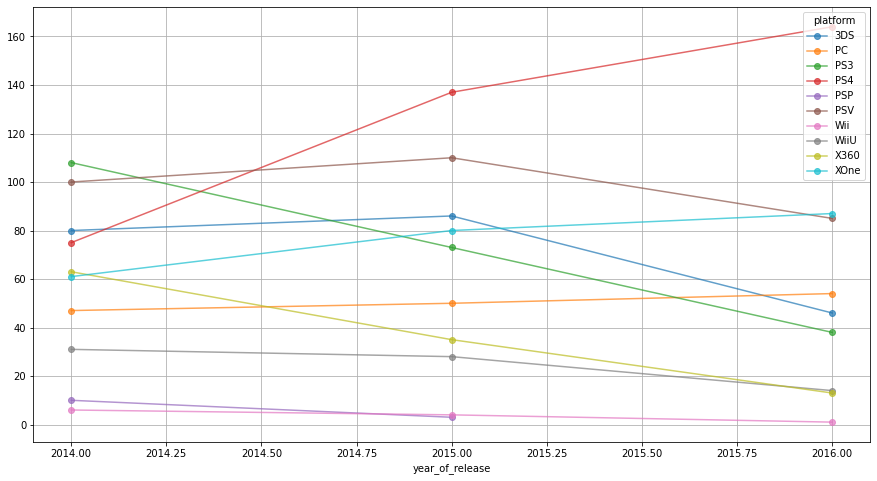

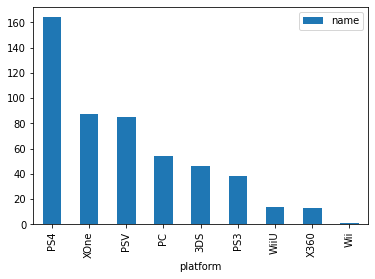

In [23]:
(period.pivot_table(index='year_of_release', columns = 'platform', values='name', aggfunc='count')
 .plot(style='o-', figsize=(15, 8), grid=True, alpha=0.7))
period[period['year_of_release'] > 2015].pivot_table(index=['platform'], values='name', aggfunc='count').sort_values(by='name', ascending=False).plot(kind='bar')

***Вывод:***

Можно выделить восемь лидеров по продажам на конец 2016 года:
* **PS4**
* **XOne**
* **PSV**
* **PC**
* **3DS**
* **PS3**
* **WiiU**
* **X360**

Так же отметим, что рынок игр в целом падает.

Далее будем работать только с лидирующими платформами.

In [24]:
leaders = ['PS4', 'XOne', 'PSV', 'PC', '3DS', 'PS3', 'WiiU', 'X360']
period = period[period['platform'].isin(leaders)]

5) Построим график «ящик с усами» по глобальным продажам игр за актуальный период:

(0.0, 3.0)

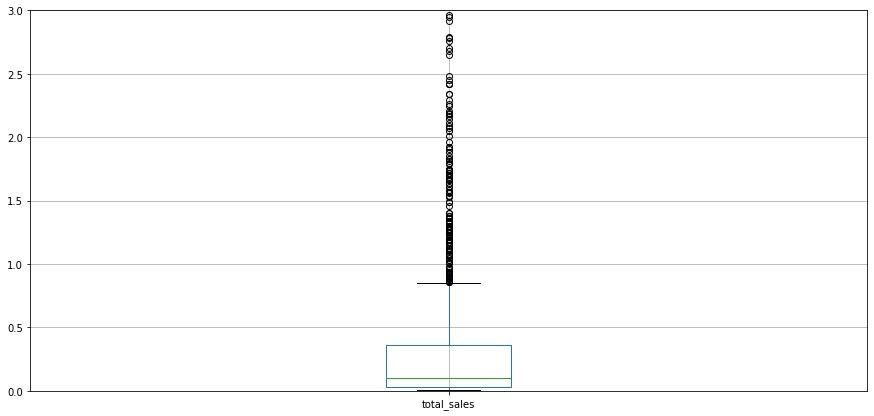

In [25]:
period.boxplot(column='total_sales', figsize=(15, 7))
plt.ylim(0, 3)

***Вывод:***

Суммарные продажи игр в среднем составляют до 0,8 млн долларов, медиана - 0,2 млн.

Построим графики «ящик с усами» по глобальным продажам игр в разбивке по платформам за актуальный период:

(0.0, 3.0)

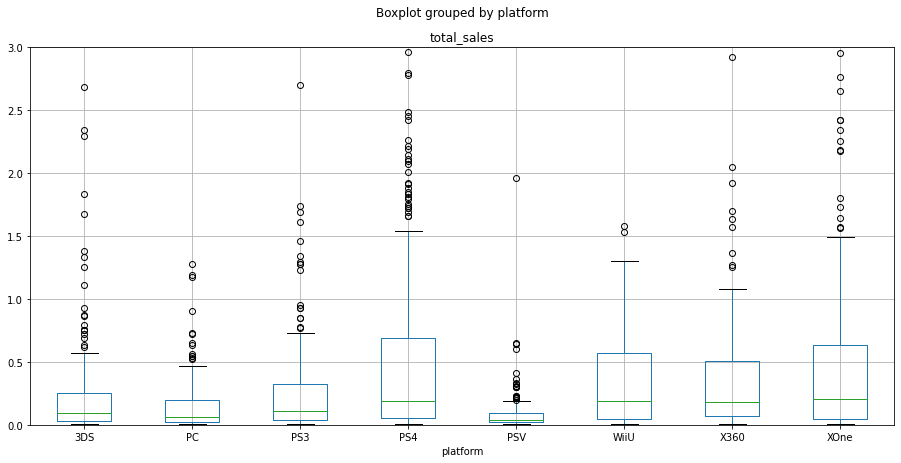

In [26]:
period.boxplot(column='total_sales', by='platform', figsize=(15, 7))
plt.ylim(0, 3)

***Вывод:***

Медиана лидирующих платформ "скачет" от 0,1 до 0,25 млн долларов. Наибольшую прибыль приносят **PS4**, **XOne** и **WiiU** - до 1,6 млн. Самыми неприбылиными оказались платформы **PSV** и **PC** - их медиана всего 0,1 млн, а максимальная прибыль - 0,2-0,4 млн.

6) Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для примера возьмем **PS4**:

In [27]:
ps4 = period[(period['platform'] == 'PS4') & (period['critic_score'] >= 0) & (period['user_score'] >= 0)]

Построим диаграмму рассеивания зависимости продаж от оценки критиков:

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

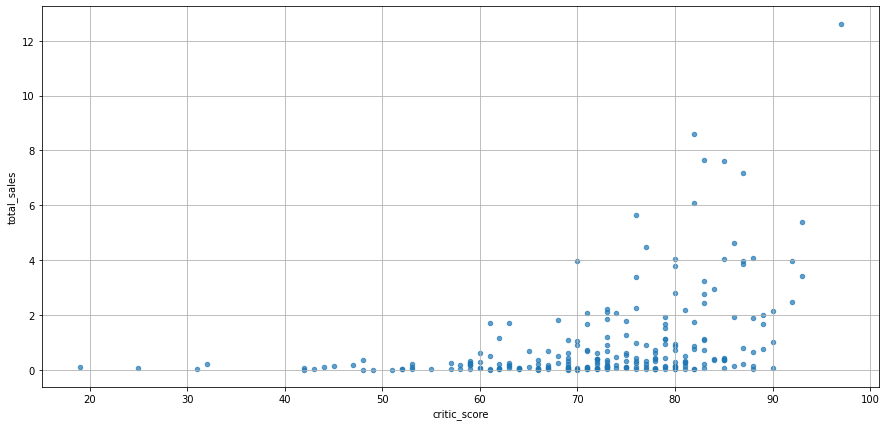

In [28]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha = 0.7, grid=True, figsize=(15, 7))

***Вывод:***

Чем выше оценки критиков - тем больше продаж.

Построим диаграмму рассеивания зависимости продаж от оценки пользователей:

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

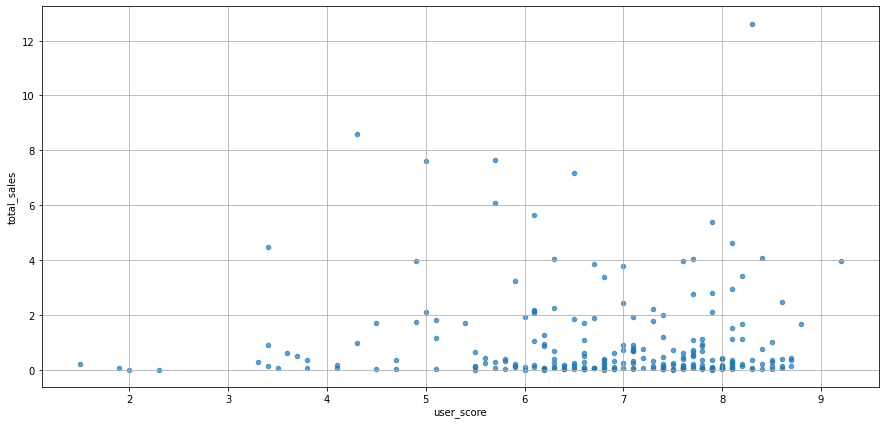

In [29]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha = 0.7, figsize=(15, 7))

***Вывод:***

С увеличением оценок пользователей, увеличиваются и продажи. Однако складывается впечатление, что данная зависимость слабее зависимости продаж от оценок критиков.

Проверим предположение, посчитав коэффициенты корреляции:

In [30]:
print('Корреляция между отзывами критиков и продажами:', ps4['critic_score'].corr(ps4['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', ps4['user_score'].corr(ps4['total_sales']))

Корреляция между отзывами критиков и продажами: 0.40190287811475334
Корреляция между отзывами пользователей и продажами: -0.04318585997193634


***Вывод:***

Положительные коэффициенты корреляции говорят о том, что обе зависимости прямые. Но корреляция между отзывами критиков и продажами достаточно сильно выше корреляции между отзывами пользователей и продажами, что говорит о том, что оценки критиков намного сильнее влияют на решение о покупке игры.

7) Посмотрим на корреляцию между отзывами критиков/пользователей и продажами на остальных платформах.

Напишем функцию для подсчета коэффициента корреляции:

In [31]:
def corr(platform):
    for i in platform:
        x = period[(period['platform'] == i) & (period['critic_score'] > 0) & (period['user_score'] > 0)]
        print('Критики и продажи для', i, ':', x['critic_score'].corr(x['total_sales']))
        print('Пользователи и продажи для', i, ':', x['user_score'].corr(x['total_sales']))
        print()

In [32]:
leaders = ['PS4', 'XOne', 'PSV', 'PC', '3DS', 'PS3', 'WiiU', 'X360']
corr(leaders)

Критики и продажи для PS4 : 0.40190287811475334
Пользователи и продажи для PS4 : -0.04318585997193634

Критики и продажи для XOne : 0.42211185105557647
Пользователи и продажи для XOne : -0.0917343450331075

Критики и продажи для PSV : 0.04102908974171329
Пользователи и продажи для PSV : 0.023528216599023048

Критики и продажи для PC : 0.17206091490145103
Пользователи и продажи для PC : -0.08997391228554938

Критики и продажи для 3DS : 0.28468579095782925
Пользователи и продажи для 3DS : 0.2798498792503281

Критики и продажи для PS3 : 0.44657460493190704
Пользователи и продажи для PS3 : 0.15659516181359956

Критики и продажи для WiiU : 0.3756402218389979
Пользователи и продажи для WiiU : 0.4114513876908575

Критики и продажи для X360 : 0.5257228356581523
Пользователи и продажи для X360 : 0.33651362483599345



***Вывод:***

Данные по всем платформам немного различаются от данных по **PS3**. Например, у таких платформ, как **PS4**, **XOne** и **PC** корреляция между оценками пользователей и продажами хоть и небольшая по модулю, но отрицательная, что говорит об обратной зависимости.

8) Посмотрим на распределение игр по жанрам.

Сначала проанализируем зависимость суммарных продаж от жанров:

<AxesSubplot:xlabel='genre'>

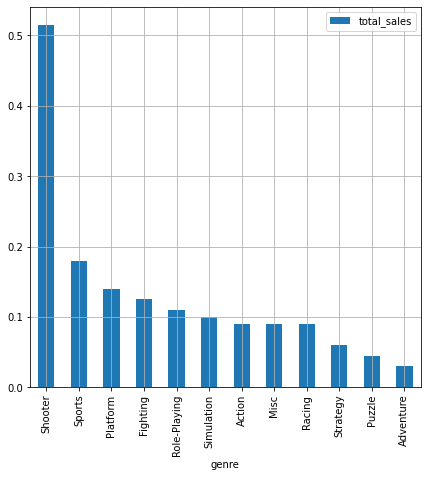

In [33]:
(period.pivot_table(index='genre', values='total_sales', aggfunc='median')
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', figsize=(7, 7), grid=True))

***Вывод:***

Наибольший медианный доход приносят жанры **Shooter** и **Sports**. Наименьший - **Adventure**.

Далее посмторим на количество игр по жанрам:

<AxesSubplot:xlabel='genre'>

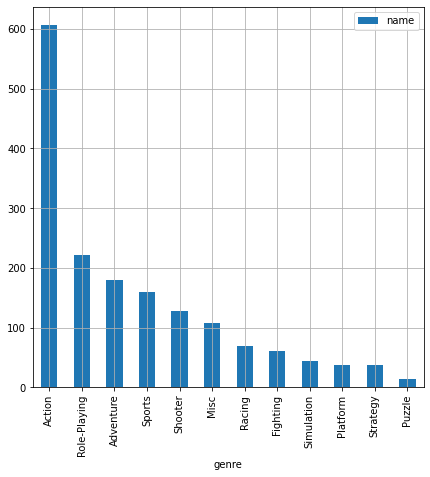

In [34]:
(period.pivot_table(index='genre', values='name', aggfunc='count')
 .sort_values(by='name', ascending=False)
 .plot(kind='bar', figsize=(7, 7), grid=True))

***Вывод:***

Безусловным лидером по количеству игр становится жанр **Action**, a в самом конце **Puzzle**.

###  Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* самые популярные платформы (топ-5);
* самые популярные жанры (топ-5);
* влияние рейтинга ESRB на продажи в отдельном регионе.

Напишем функцию для построения гистограмм:

In [35]:
def region(column1, column2, x):
    pivot = period.pivot_table(index=column1, values=column2, aggfunc=x).sort_values(by=column2, ascending=False)
    name = (column2 + ' / ' + column1).replace('_', ' ')
    return pivot.plot(kind='bar', title=name, grid=True, figsize=(5, 5))

1) Выделим топ-5 платформ для каждого региона

Определим топ-5 платформ для Северной Америки:

<AxesSubplot:title={'center':'na sales / platform'}, xlabel='platform'>

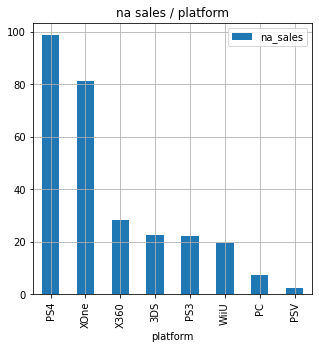

In [36]:
region('platform', 'na_sales', 'sum')

Судя по графику, безусловным лидером становится  **PS4**, на втором месте - **XOne**. Доли продаж остальных платформ сильно ниже.

Выделим следущие пять платформ:
* **PS4**
* **XOne**
* **X360**
* **3DS**
* **PS3**

Определим топ-5 платформ для Европы: 

<AxesSubplot:title={'center':'eu sales / platform'}, xlabel='platform'>

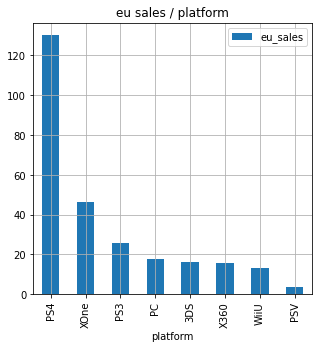

In [37]:
region('platform', 'eu_sales', 'sum')

Судя по графику, безусловным лидером становится  **PS4**, на втором месте - **XOne**. Доли продаж остальных платформ сильно ниже.

Выделим следущие пять платформ:
* **PS4**
* **XOne**
* **PS3**
* **PC**
* **3DS**

Определим топ-5 платформ для Японии: 

<AxesSubplot:title={'center':'jp sales / platform'}, xlabel='platform'>

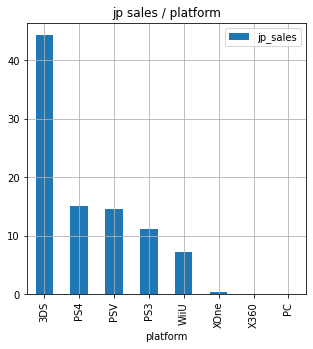

In [38]:
region('platform', 'jp_sales', 'sum')

Судя по графику, безусловным лидером становится  **3DS**, на втором месте - **PS4**. Доли продаж остальных платформ сильно ниже.

Выделим следущие пять платформ:
* **3DS**
* **PS4**
* **PSV**
* **PS3**
* **WiiU**

***Вывыод:***

Вкусы Северной Америки и Европы схожи - **PS4** и **XOne** безусловно лидируют. Разница лишь в том, что в Америке предпочитают **X360**, вместо **PC**.

В Японии картина иная - на первом по популярности месте **3DS**, **XOne** вообще в топ не попал, зато добавились **PSV** и **WiiU**.

2) Выделим топ-5 жанров для каждого региона

Определим 5 самых популярных жанров для Северной Америки:

<AxesSubplot:title={'center':'na sales / genre'}, xlabel='genre'>

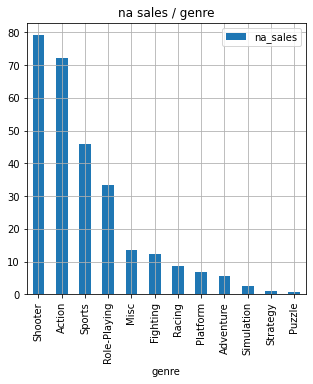

In [39]:
region('genre', 'na_sales', 'sum')

Судя по графику, безусловным лидером становится  **Shooter**, на втором месте - **Action**. Доли продаж остальных платформ сильно ниже.

Выделим следущие пять платформ:
* **Shooter**
* **Action**
* **Sports**
* **Role-Playing**
* **Misc**

Определим 5 самых популярных жанров для Европы:

<AxesSubplot:title={'center':'eu sales / genre'}, xlabel='genre'>

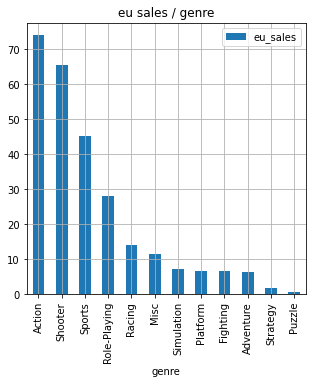

In [40]:
region('genre', 'eu_sales', 'sum')

Судя по графику, безусловным лидером становится  **Action**, на втором месте - **Shooter**. Доли продаж остальных платформ сильно ниже.

Выделим следущие пять платформ:
* **Action**
* **Shooter**
* **Sports**
* **Role-Playing**
* **Racing**

Определим 5 самых популярных жанров для Японии:

<AxesSubplot:title={'center':'jp sales / genre'}, xlabel='genre'>

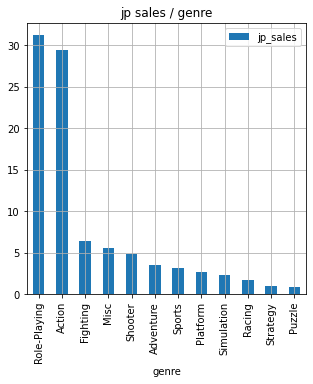

In [41]:
region('genre', 'jp_sales', 'sum')

Судя по графику, безусловным лидером становится  **Role-Playing**, на втором месте - **Action**. Доли продаж остальных платформ сильно ниже.

Выделим следущие пять платформ:
* **Role-Playing**
* **Action**
* **Fighting**
* **Misc**
* **Shooter**

***Вывыод:***

Вкусы Северной Америки и Европы схожи - **Action** и **Shooter** безусловно лидируют. Разница лишь в том, что в Америке предпочитают **Misc**, вместо **Racing**.

В Японии картина иная - на первом по популярности месте **Role-Playing**.

3) Посмотрим, влияет ли рейтинг ESRB на продажи

Для удобства работы с рейтингом, переведем его из условных обозначений в ранжировку по возрастам

In [42]:
period['rating'].unique()

array(['nan', 'M', 'E', 'T', 'E10+'], dtype=object)

In [43]:
period.loc[period['rating'] == 'E', 'rating'] = '6+'
period.loc[period['rating'] == 'M', 'rating'] = '17+'
period.loc[period['rating'] == 'T', 'rating'] = '13+'
period.loc[period['rating'] == 'E10+', 'rating'] = '10+'
period.loc[period['rating'] == 'EC', 'rating'] = '3+'

In [44]:
def pie(column1, column2, x):
    pivot = period.pivot_table(index=column1, values=column2, aggfunc=x).sort_values(by=column2, ascending=False)
    name = (column2 + ' / ' + column1).replace('_', ' ')
    return pivot.plot(kind='pie', title=name, grid=True, figsize=(5, 5), subplots=True, autopct='%1.1f%%')

Для Америки:

array([<AxesSubplot:ylabel='na_sales'>], dtype=object)

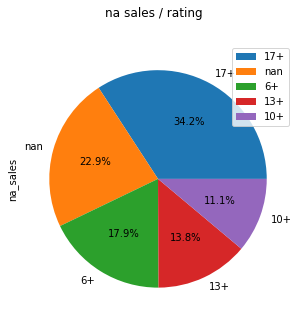

In [45]:
pie('rating', 'na_sales', 'sum')

В Америке явно предпочитают игры 17+, на втором и третьем месте 13+ и 6+ соответственно.

Для Европы:

array([<AxesSubplot:ylabel='eu_sales'>], dtype=object)

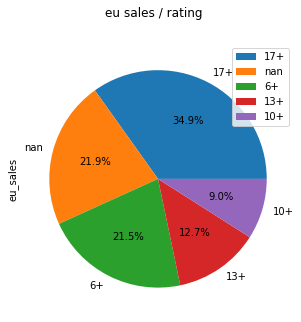

In [46]:
pie('rating', 'eu_sales', 'sum')

В Европе ситуация не сильно отличается. На первом месте по прежнему игры 17+.

Для Японии:

array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

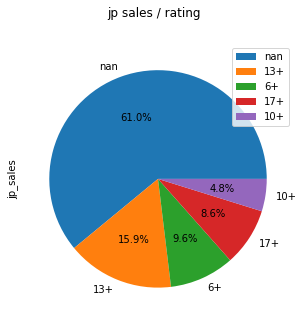

In [47]:
pie('rating', 'jp_sales', 'sum')

В Японии, как обычно, ситуация иная. Как бы это не выглядело странно - японцы предпочитают игры без рейтинга... На втором месте 13+, а 17+ уже на третьем.

### Проверка гипотез

1) Сформулируем гипотезы:

Н0: Средние пользовательские рейтинги платформ **XOne** и **PC** равны;

Н1: Средние пользовательские рейтинги платформ **XOne** и **PC** не равны.

Воспользуемся методом scipy.stats.ttest_ind(array1, array2):

In [48]:
period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,nan,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,17+,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,nan,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,6+,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,nan,7.98


In [49]:
xone_rating = period[(period['platform'] == 'XOne') & (period['user_score'] >= 0)]
pc_rating = period[(period['platform'] == 'PC') & (period['user_score'] >= 0)]

alpha = .05
results = st.ttest_ind(xone_rating['user_score'], pc_rating['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.10450507919348415
Не отвергаем нулевую гипотезу


In [50]:
print('Средний рейтинг XOne:', round(xone_rating['user_score'].mean(), 2))
print('Средний рейтинг PC:',round(pc_rating['user_score'].mean(), 2))

Средний рейтинг XOne: 6.59
Средний рейтинг PC: 6.3


***Вывод:***

Нулевая гипотеза оказалась верна, принимаем гипотезу о том, что средние пользовательские рейтинги платформ **XOne** и **PC** равны. Рейтинг практически не отличается.

2) Сформулируем гипотезы:

Н0: Средние пользовательские рейтинги жанров **Action** и **Sports** равны;

Н1: Средние пользовательские рейтинги жанров **Action** и **Sports** не равны.

Воспользуемся методом scipy.stats.ttest_ind(array1, array2):

In [51]:
action_rating = period[(period['genre'] == 'Action') & (period['user_score'] >= 0)]
sports_rating = period[(period['genre'] == 'Sports') & (period['user_score'] >= 0)]

alpha = .05
results = st.ttest_ind(action_rating['user_score'], sports_rating['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 5.345452934773537e-19
Отвергаем нулевую гипотезу


In [52]:
print('Средний рейтинг Action:', round(action_rating['user_score'].mean(), 2))
print('Средний рейтинг Sports:',round(sports_rating['user_score'].mean(), 2))

Средний рейтинг Action: 6.76
Средний рейтинг Sports: 5.23


***Вывод:***

Нулевая гипотеза неверна, принимаем гипотезу о том, что средние пользовательские рейтинги жанров **Action** и **Sports** не равны. По рейтингу лидирует жанр **Sports**.

### Общий вывод

Из проделанного анализа можно сделать следущие выводы:

* в целом рынок игр находится в упадке;
* лидирующими платформами оказались **PS4**, **XOne**, **PSV**, **PC**, **3DS**, **PS3**, **WiiU**, **X360**; при чем **PS4** сильно впереди остальных;
* суммарные продажи игр в среднем составляют до 0,8 млн долларов, медиана - 0,2 млн;
* медиана лидирующих платформ "скачет" от 0,1 до 0,25 млн долларов;
* наибольшую прибыль приносят **PS4**, **XOne** и **WiiU** - до 1,6 млн; 
* самыми неприбылиными оказались платформы **PSV** и **PC** - их медиана всего 0,1 млн, а максимальная прибыль - 0,2-0,4 млн;
* оценки критиков достаточно сильно влияют на решение о покупке игры, в отличае от оценок пользователей;
* наибольший медианный доход приносят жанры **Shooter** и **Sports**, наименьший - **Adventure**;
* по платформам вкусы Северной Америки и Европы схожи - **PS4** и **XOne** безусловно лидируют; разница лишь в том, что в Америке предпочитают **XOne**, вместо **PC**;
* в Японии на первом по популярности месте **3DS**;
* по жанрам вкусы Северной Америки и Европы так же схожи - **Action** и **Shooter** безусловно лидируют; разница лишь в том, что в Америке предпочитают **Misc**, вместо **Racing**.
* в Японии на первом по популярности месте **Role-Playing**;
* в Америке, как и в Европе предпочитают игры 17+, на втором и третьем месте 13+ и 6+ соответственно;
* в Японии, скорее, предпочитают игры 13+;
* средние пользовательские рейтинги платформ **XOne** и **PC** практически равны;
* средний пользовательский рейтинг XOne: 6.59;
* средний пользовательский рейтинг PC: 6.3;
* средние пользовательские рейтинги жанров **Action** и **Sports** различаются;
* средний рейтинг Action: 6.76;
* средний рейтинг Sports: 5.23.